# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

Pasos a seguir:
- Tratar los valores ausentes
- Corregir los tipos de datos
- Estudiar las variables principales
- Tratar los valores atípicos
- Ver que factores afectan al precio

## Inicialización

In [143]:
#cargando todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

### Cargar datos

In [144]:
#cargando el archivo de datos en un DataFrame
try:
    df = pd.read_csv("/datasets/vehicles_us.csv")
except:
    df = pd.read_csv("vehicles_us.csv")

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price` - precio del vehículo
- `model_year` - año del vehículo
- `model` - modelo
- `condition` - condición del vehículo
- `cylinders` - 
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `type` - tipo de vehículo
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [145]:
#imprimiendo la información general/resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [146]:
# imprimiendo una muestra de datos
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Descripción general de lo observado anteriormente

- Hay muchas columnas con datos ausentes
- Hay un par de columnas donde se podría cambiar el tipo de datos

Revisión de datos por columna

In [147]:
#observando los datos unicos
for col in df:
    print(col)
    print(df.sort_values(by=col, ascending=True)[col].unique())
    print(" ")

price
[     1      3      5 ... 189000 300000 375000]
 
model_year
[1908. 1929. 1936. 1948. 1949. 1954. 1955. 1958. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.   nan]
 
model
['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse' 'chrysler 200' 'chrysler 300'
 'chrysler town & c

- Parece ser que hay que indagar más en la columna "price" ya que se ven valores muy pequeños.
- La columna "model" tiene valores repetidos pero escritos de forma distinta.
- La columna "color" tiene un valor "custom" que hay que investigar.

In [148]:
#reemplazando algunos datos de "model"
df["model"] = df["model"].replace("ford f-250 super duty", "ford f-250 sd")
df["model"] = df["model"].replace("ford f250 super duty", "ford f-250 sd")
df["model"] = df["model"].replace("ford f350 super duty", "ford f-350 sd")
df["model"] = df["model"].replace("ford f250", "ford f-250")
df["model"] = df["model"].replace("ford f150", "ford f-150")
df["model"] = df["model"].replace("ford f350", "ford f-350")

In [149]:
#observando los cambios
for col in df:
    print(col)
    print(df.sort_values(by=col, ascending=True)[col].unique())
    print(" ")

price
[     1      3      5 ... 189000 300000 375000]
 
model_year
[1908. 1929. 1936. 1948. 1949. 1954. 1955. 1958. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.   nan]
 
model
['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse' 'chrysler 200' 'chrysler 300'
 'chrysler town & c

Columnas con el tipo de dato inapropiado:

- Los datos de "model_year" pueden ser enteros en vez de float.
- La columna "date_posted" está como objeto, y debería estar con formato fecha.
- La columna "is_4wd" podría ser booleana

Columnas con datos ausentes:

Existen valores austentes en algunas columnas: "model_year", "cylinder", "odometer", "paint_color", "is_4wd".

La columna que tiene la mayor cantidad de valores ausentes es "is_4wd", que se refiere a si el vehículo tiene tracción de 4 ruedas o no.

### Conclusiones y siguientes pasos

Hay columnas que deben tratarse para que el análisis de los datos sea más adecuado.

Primero se revisarán las columnas con valores ausentes, se hará un análisis para ver si es necesario eliminar datos o reemplazarlos.

Luego se corregirán los tipos de datos de las columnas mencionadas anteriormente. 

## Tratar los valores ausentes

Primero se tratarán los valores ausentes de la columna "is_4wd", ya que a simple vista se puede asumir que los valores ausentes son "false"

**is_4wd**

In [150]:
#calculando el porcentaje de valores nulos en "is_4wd"
is_not_4wd = df["is_4wd"].isna().sum()
total_data = df["price"].count()
print("El porcentaje de datos ausentes en esta columna es {:.2%}".format(is_not_4wd/total_data))

El porcentaje de datos ausentes en esta columna es 50.37%


Al ser tan alto el % de datos ausentes, podemos asumir que todos esos datos en realidad son los que no tienen tracción en las 4 ruedas, por lo que le daremos valor 0, para que cuando corrijamos la columna para que sea booleana tengamos solo datos True o False.

In [151]:
#rellenando el los valores nulos
df["is_4wd"] = df["is_4wd"].fillna(0)
#verificando que se rellenaron
print(df["is_4wd"].unique())

[1. 0.]


Ahora se estudiará si hay alguna característica que influya en los valores ausentes, o simplemente son aleatorios.

In [152]:
#función para calcular los nulos de cada columna
def get_nulls_by_group(df, nulls_col):
    for col in df:
        print(df[nulls_col].isna().groupby(df[col]).agg(["mean", "sum", "count"]).reset_index().sort_values(by="count", ascending=False))
        print(" ")

In [153]:
#calculando la relación entre los valores ausentes de "model_year" y las otras variables.
get_nulls_by_group(df, "model_year")

       price      mean  sum  count
0          1  0.065163   52    798
744     6995  0.055633   40    719
617     5995  0.058015   38    655
490     4995  0.064103   40    624
317     3500  0.069355   43    620
...      ...       ...  ...    ...
1701   15480  0.000000    0      1
1700   15475  0.000000    0      1
1699   15469  0.000000    0      1
1698   15455  0.000000    0      1
3442  375000  0.000000    0      1

[3443 rows x 4 columns]
 
    model_year  mean  sum  count
61      2013.0   0.0    0   3549
60      2012.0   0.0    0   3468
62      2014.0   0.0    0   3448
59      2011.0   0.0    0   3375
63      2015.0   0.0    0   3323
..         ...   ...  ...    ...
6       1955.0   0.0    0      1
5       1954.0   0.0    0      1
4       1949.0   0.0    0      1
3       1948.0   0.0    0      1
2       1936.0   0.0    0      1

[68 rows x 4 columns]
 
                                model      mean  sum  count
32                         ford f-150  0.069152  230   3326
13          

In [154]:
#calculando la relación entre los valores ausentes de "cylinders" y las otras variables.
get_nulls_by_group(df, "cylinders")

       price      mean  sum  count
0          1  0.088972   71    798
744     6995  0.121001   87    719
617     5995  0.103817   68    655
490     4995  0.113782   71    624
317     3500  0.091935   57    620
...      ...       ...  ...    ...
1701   15480  0.000000    0      1
1700   15475  0.000000    0      1
1699   15469  0.000000    0      1
1698   15455  0.000000    0      1
3442  375000  0.000000    0      1

[3443 rows x 4 columns]
 
    model_year      mean  sum  count
61      2013.0  0.097210  345   3549
60      2012.0  0.108131  375   3468
62      2014.0  0.102958  355   3448
59      2011.0  0.097185  328   3375
63      2015.0  0.107433  357   3323
..         ...       ...  ...    ...
6       1955.0  0.000000    0      1
5       1954.0  1.000000    1      1
4       1949.0  1.000000    1      1
3       1948.0  0.000000    0      1
2       1936.0  0.000000    0      1

[68 rows x 4 columns]
 
                                model      mean  sum  count
32                      

In [155]:
#calculando la relación entre los valores ausentes de "odometer" y las otras variables.
get_nulls_by_group(df, "odometer")

       price      mean  sum  count
0          1  0.154135  123    798
744     6995  0.155772  112    719
617     5995  0.129771   85    655
490     4995  0.145833   91    624
317     3500  0.137097   85    620
...      ...       ...  ...    ...
1701   15480  0.000000    0      1
1700   15475  0.000000    0      1
1699   15469  0.000000    0      1
1698   15455  0.000000    0      1
3442  375000  0.000000    0      1

[3443 rows x 4 columns]
 
    model_year      mean  sum  count
61      2013.0  0.161454  573   3549
60      2012.0  0.154556  536   3468
62      2014.0  0.157193  542   3448
59      2011.0  0.148741  502   3375
63      2015.0  0.154680  514   3323
..         ...       ...  ...    ...
6       1955.0  0.000000    0      1
5       1954.0  0.000000    0      1
4       1949.0  0.000000    0      1
3       1948.0  0.000000    0      1
2       1936.0  0.000000    0      1

[68 rows x 4 columns]
 
                                model      mean  sum  count
32                      

In [156]:
#calculando la relación entre los valores ausentes de "paint_color" y las otras variables.
get_nulls_by_group(df, "paint_color")

       price      mean  sum  count
0          1  0.189223  151    798
744     6995  0.165508  119    719
617     5995  0.160305  105    655
490     4995  0.190705  119    624
317     3500  0.174194  108    620
...      ...       ...  ...    ...
1701   15480  1.000000    1      1
1700   15475  0.000000    0      1
1699   15469  0.000000    0      1
1698   15455  0.000000    0      1
3442  375000  0.000000    0      1

[3443 rows x 4 columns]
 
    model_year      mean  sum  count
61      2013.0  0.190194  675   3549
60      2012.0  0.174452  605   3468
62      2014.0  0.186485  643   3448
59      2011.0  0.177185  598   3375
63      2015.0  0.184472  613   3323
..         ...       ...  ...    ...
6       1955.0  0.000000    0      1
5       1954.0  0.000000    0      1
4       1949.0  0.000000    0      1
3       1948.0  0.000000    0      1
2       1936.0  0.000000    0      1

[68 rows x 4 columns]
 
                                model      mean  sum  count
32                      

Según los resultados anteriores, no se puede observar una carecterística que influya en que el valor sea ausente, ya que todos los porcentajes son similares para cada característica, teniendo en cuenta las que tienen una mayor cantidad de datos.

Esto permite concluir que los datos ausentes probablemente son aleatorios.

A continuación, se tratarán los valores ausentes de cada variable restante.

**paint_color**

El color de un vehículo no depende de ningún otro atributo. por lo que se rellenará con "unknown"

In [157]:
df["paint_color"] = df["paint_color"].fillna("unknown")

In [158]:
df["paint_color"]

0        unknown
1          white
2            red
3        unknown
4          black
          ...   
51520      black
51521      white
51522       blue
51523      black
51524    unknown
Name: paint_color, Length: 51525, dtype: object

In [159]:
#verificando que se rellenaron los datos
df["paint_color"].isna().sum()

0

Se logró restaurar los valores ausentes de "paint_color", sustituyendo por "unknown"

**model_year**

Puede depender de "model" o de "condition"

In [160]:
#creando un df sin valores ausentes para "model_year"
df_filtered_model_year = df.dropna(subset = ["model_year"]).reset_index(drop = True)

In [161]:
#creando una tabla dinámica para ver el año según condición y modelo
year_by_model_condition = df_filtered_model_year.pivot_table(index=["model","condition"], values="model_year", aggfunc="median")
year_by_model_condition

model_year
model             condition            
acura tl          excellent      2009.0
                  fair           2004.0
                  good           2007.0
                  like new       2007.0
bmw x5            excellent      2010.0
...                                 ...
volkswagen passat fair           2005.0
                  good           2013.0
                  like new       2012.5
                  new            2008.5
                  salvage        2000.0

[464 rows x 1 columns]

Se puede observar que dependiendo del modelo y de la condición por cada modelo, el año varía bastante, por lo que se usará ambas características para determinar el valor ausente de "model_year".

In [162]:
#función que se usará para rellenar la columna "model_year"
def filling_model_year(row):
    model = row["model"]
    condition = row["condition"]
    year = row["model_year"]
    if pd.isna(year):
        try:
            return year_by_model_condition.loc[(model,condition), "model_year"]
        except:
            return df_filtered_model_year[df_filtered_model_year["model"]==model]["model_year"].median()
    return year

In [163]:
#comprobando que la función funcione
filling_model_year(df.iloc[1])

2007.0

In [164]:
#comprobando que la función funcione
filling_model_year(df.iloc[2]) #debe salir 2013

2013.0

In [165]:
#usando la función para rellenar todos los datos
df["model_year"] = df.apply(filling_model_year, axis=1)

In [166]:
#comprobando que no quedan valores ausentes
df["model_year"].isna().sum()

0

**cylinders**

El cilindraje de un vehículo puede depender del modelo ("model") y de si tiene tracciones en las 4 ruedas o no ("is_4wd").

In [167]:
#creando una base de datos que no tenga datos ausentes en la columna "cylinders"
df_filtered_cylinders = df.dropna(subset = ["cylinders"]).reset_index(drop = True)

In [168]:
#creando una tabla dinámica para ver la cantidad de cilindros según si tiene tracción en las 4 ruedas y el modelo
cylinders_by_model_is4wd = df_filtered_cylinders.pivot_table(index=["model","is_4wd"], values="cylinders", aggfunc="median")
cylinders_by_model_is4wd

cylinders
model             is_4wd           
acura tl          0.0           6.0
                  1.0           6.0
bmw x5            0.0           6.0
                  1.0           6.0
buick enclave     0.0           6.0
...                             ...
toyota tundra     1.0           8.0
volkswagen jetta  0.0           4.0
                  1.0           4.0
volkswagen passat 0.0           4.0
                  1.0           6.0

[183 rows x 1 columns]

In [169]:
#función que se usará para rellenar la columna "cylinders"
def filling_cylinders(row):
    model = row["model"]
    is_4wd = row["is_4wd"]
    cylinders = row["cylinders"]
    if pd.isna(cylinders):
        try:
            return cylinders_by_model_is4wd.loc[(model,is_4wd), "cylinders"]
        except:
            return 0
    return cylinders

In [170]:
#comprobando que la función funcione
filling_cylinders(df.iloc[9])

6.0

In [171]:
#comprobando que la función funcione
filling_cylinders(df.iloc[8]) #debe arrojar 4.0

4.0

In [172]:
#aplicando la función para rellenar datos en "cylinders"
df["cylinders"] = df.apply(filling_cylinders, axis=1)

In [173]:
#comprobando que no quedan valores ausentes
df["model_year"].isna().sum()

0

Luego de haber rellenado los valores de "cylinders", debemos comprobar que no quedó ninguna fila con valor "cylinders" == 0, en caso de que si se debe hacer un estudio de los modelos para reemplazarlo, ya que esto significa que no había ningún dato del mismo modelo para comparar.

In [174]:
#observando si algún valor quedó con 0
df[df["cylinders"]== 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33953,3000,2007.0,nissan maxima,excellent,0.0,gas,134657.0,automatic,sedan,silver,1.0,2018-12-15,16


In [175]:
#arreglando el valor que quedó con cero
list_of_nissan=['nissan altima', 'nissan frontier', 'nissan frontier crew cab sv', 'nissan maxima', 'nissan murano', 'nissan rogue', 'nissan sentra', 'nissan versa']
df["nissan"] = df.model.isin(list_of_nissan)
median_nissan_cylinders = df[df["nissan"]]["cylinders"].median()
df["cylinders"] = df["cylinders"].replace(0,median_nissan_cylinders)
df[df["cylinders"]== 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,nissan


In [176]:
#eliminando columna "nissan"
df.pop("nissan")
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2007.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


**odometer**

El millaje de un vehículo puede depender del año del vehículo ("model_year") y de su condición ("condition"), pues si está en peor estado puede ser que alla tenido mayor uso.

In [177]:
#creando un df sin los valores ausentes de "odometer"
df_filtered_odometer = df.dropna(subset = ["odometer"]).reset_index(drop = True)
df_filtered_odometer.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2007.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


In [178]:
#viendo como influye el año del vehículo y su condición en la variación de "odometer"
odometer_by_year_condition = df_filtered_odometer.pivot_table(index=["condition","model_year"], values="odometer", aggfunc=["mean"])
odometer_by_year_condition

mean
                       odometer
condition model_year           
excellent 1936.0      30000.000
          1954.0       3565.000
          1955.0      47180.000
          1958.0       3184.000
          1960.0      16000.000
...                         ...
salvage   2015.0      40975.000
          2016.0      28000.000
          2017.0      47835.125
          2018.0      23810.500
          2019.0       9621.000

[277 rows x 1 columns]

In [179]:
#viendo como influye el año del vehículo en la variación de "odometer"
odometer_by_model_year = df_filtered_odometer.pivot_table(index="model_year", values="odometer", aggfunc="median")
odometer_by_model_year

,odometer
model_year,
1908.0,169328.0
1936.0,30000.0
1948.0,4000.0
1949.0,1800.0
1954.0,3565.0
...,...
2016.0,54000.0
2016.5,37577.5
2017.0,41000.0


Se rellenarán los datos ausentes de "odometer" según el año del modelo, con la mediana de "odometer"

In [180]:
#función que se usará para rellenar la columna "odometer"
def filling_odometer(row):
    year = row["model_year"]
    odometer = row["odometer"]
    if pd.isna(odometer):
        try:
            return odometer_by_model_year.loc[year, "odometer"]
        except:
            return 0
    return odometer

In [181]:
#comprobando que la función funcione
filling_odometer(df.iloc[3])

161683.5

In [182]:
#comprobando que la función funcione
filling_odometer(df.iloc[2])

110000.0

In [183]:
#usando la función para rellenar todos los datos
df["odometer"] = df.apply(filling_odometer, axis=1)

In [184]:
#verificando que se rellenaron los datos
df["odometer"].isna().sum()

0

## Corregir los tipos de datos

En esta sección se corregirá el tipo de dato de las columnas para poder trabajar mejor con ellas.

In [185]:
#convirtiendo "model_year" en int64
df["model_year"] = df["model_year"].astype("int")

In [186]:
#convirtiendo "cylinders" en int64
df["cylinders"] = df["cylinders"].astype("int")

In [187]:
#convirtiendo "is_4wd" a boolean
df["is_4wd"] = df["is_4wd"].astype("boolean")

In [188]:
#comprobando que se convirtieron a booleano
df["is_4wd"].value_counts()

False    25953
True     25572
Name: is_4wd, dtype: Int64

In [189]:
#revisando el formato de la fecha
df["date_posted"].head()

0    2018-06-23
1    2018-10-19
2    2019-02-07
3    2019-03-22
4    2019-04-02
Name: date_posted, dtype: object

In [190]:
#convirtiendo "date_posted" a date
df["date_posted"] = pd.to_datetime(df["date_posted"], format = '%Y-%m-%d')

In [191]:
#verificando todos los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  boolean       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: boolean(1), datetime64[ns](1), float64(1), int32(2), int64(2), object(6)
memory usage: 4.4+ MB


## Enriquecer datos

Se agregarán factores adicionales a los datos para facilitar el análisis.

In [192]:
#agregando año de cuando se colocó el anuncio
#df["year_posted"] = (pd.DatetimeIndex(df["date_posted"]).year).astype("int")
df['year_posted'] = df['date_posted'].dt.year

In [193]:
#agregando los años del vehículo cuando el anuncio se colocó
df["vehicle_years"] = df["year_posted"]-df["model_year"]

In [194]:
#creando la columna "odometer_mean"
df["odometer_mean"] = round((df["odometer"]/df["vehicle_years"]),2)

In [195]:
#observando las filas donde "vehicle_years" == 0
df[df["vehicle_years"] == 0].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_years,odometer_mean
19,13990,2018,hyundai elantra,excellent,4,gas,31932.0,automatic,sedan,red,False,2018-08-25,27,2018,0,inf
71,23300,2018,nissan frontier crew cab sv,good,6,gas,27493.0,other,pickup,unknown,True,2018-10-13,36,2018,0,inf
78,23800,2019,nissan frontier crew cab sv,good,6,gas,10899.0,other,pickup,silver,True,2019-02-28,30,2019,0,inf
99,39950,2018,chevrolet silverado,excellent,8,gas,18500.0,automatic,truck,unknown,True,2018-08-05,16,2018,0,inf
106,21500,2019,nissan frontier crew cab sv,good,6,gas,16168.0,other,pickup,white,False,2019-03-29,70,2019,0,inf


In [196]:
#corrigiendo filas donde "odometer_mean" es infinito
df["odometer_mean"] = df["odometer_mean"].where(df["vehicle_years"] != 0, df["odometer"])

In [197]:
#observando las filas donde "vehicle_years" == 0
df[df["vehicle_years"] == 0].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_years,odometer_mean
19,13990,2018,hyundai elantra,excellent,4,gas,31932.0,automatic,sedan,red,False,2018-08-25,27,2018,0,31932.0
71,23300,2018,nissan frontier crew cab sv,good,6,gas,27493.0,other,pickup,unknown,True,2018-10-13,36,2018,0,27493.0
78,23800,2019,nissan frontier crew cab sv,good,6,gas,10899.0,other,pickup,silver,True,2019-02-28,30,2019,0,10899.0
99,39950,2018,chevrolet silverado,excellent,8,gas,18500.0,automatic,truck,unknown,True,2018-08-05,16,2018,0,18500.0
106,21500,2019,nissan frontier crew cab sv,good,6,gas,16168.0,other,pickup,white,False,2019-03-29,70,2019,0,16168.0


In [198]:
#creando funcion para asignar valores a "condition" para manipular más fácilmente
def assign_id(condition):
    if condition == "new":
        return 5
    elif condition == "like new":
        return 4
    elif condition == "excellent":
        return 3
    elif condition == "good":
        return 2
    elif condition == "fair":
        return 1
    elif condition == "salvage":
        return 0

In [199]:
#aplicando la función para crear nueva columna
df["condition_id"] = df["condition"].apply(assign_id)
#convirtiendo la columna en int
df["condition_id"] = df["condition_id"].astype("int")

In [200]:
#verificando si funcionó la función
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_years,odometer_mean,condition_id
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018,7,20714.29,2
1,25500,2007,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,11,8064.09,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,6,18333.33,4
3,1500,2003,ford f-150,fair,8,gas,161683.5,automatic,pickup,unknown,False,2019-03-22,9,2019,16,10105.22,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,2,40451.50,3


## Comprobar datos limpios

Dado que los datos están listos para el análisis, se revisará para comprobar que todo esté bien.

In [201]:
#imprimiendo la información general/resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  int64         
 1   model_year     51525 non-null  int32         
 2   model          51525 non-null  object        
 3   condition      51525 non-null  object        
 4   cylinders      51525 non-null  int32         
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  float64       
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  boolean       
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  year_posted    51525 non-null  int64         
 14  vehicle_years  51525 non-null  int64         
 15  odometer_mean  5152

In [202]:
#imprimiendo una muestra de datos
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_years,odometer_mean,condition_id
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018,7,20714.29,2
1,25500,2007,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,11,8064.09,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,6,18333.33,4
3,1500,2003,ford f-150,fair,8,gas,161683.5,automatic,pickup,unknown,False,2019-03-22,9,2019,16,10105.22,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,2,40451.50,3


## Estudiar parámetros principales

Estudiando los valores atípicos que afectan la forma y la legibilidad de los histogramas.

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

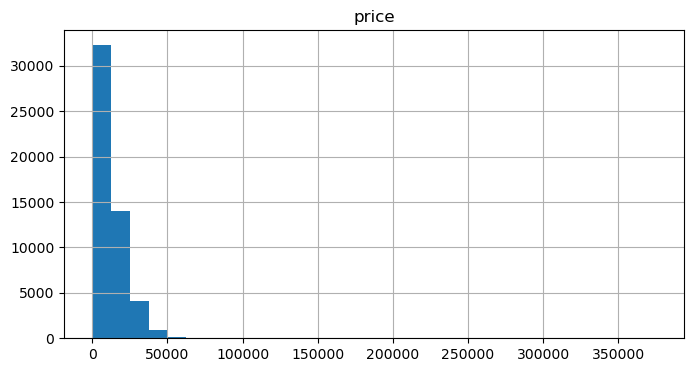

In [203]:
#estudiando "price"
hist_price = df.hist("price", bins=30, grid=True,figsize=(8,4))

Se puede observar que la columna "precio" tiene valores muy altos que se alejan mucho de la media. A continuación se ajustará el gráfico para tener una mejor visión de los datos.

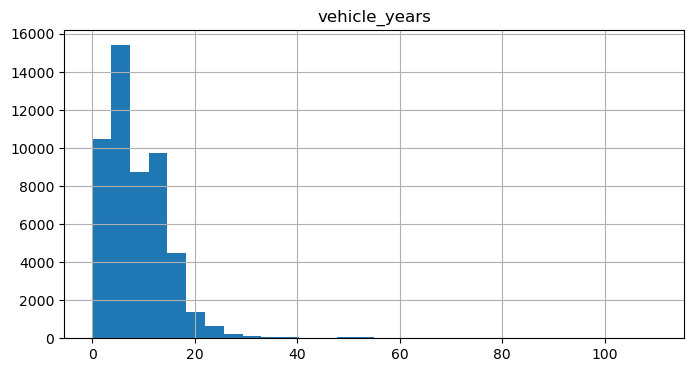

In [204]:
#estudiando "vehicle_years"
hist_vehicle_years = df.hist("vehicle_years", bins=30, grid=True,figsize=(8,4))

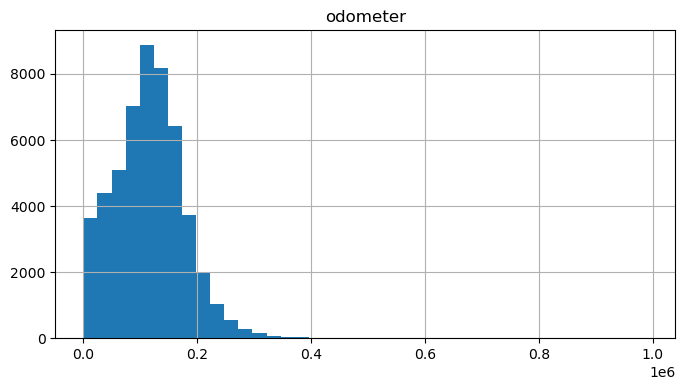

In [205]:
#estudiando "odometer"
hist_odometer = df.hist("odometer", bins=40, grid=True,figsize=(8,4))

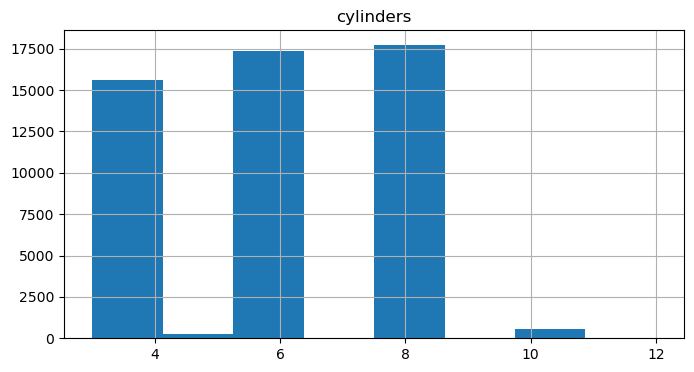

In [206]:
#estudiando "cylinders"
hist_cylinders = df.hist("cylinders", bins=8, grid=True,figsize=(8,4))

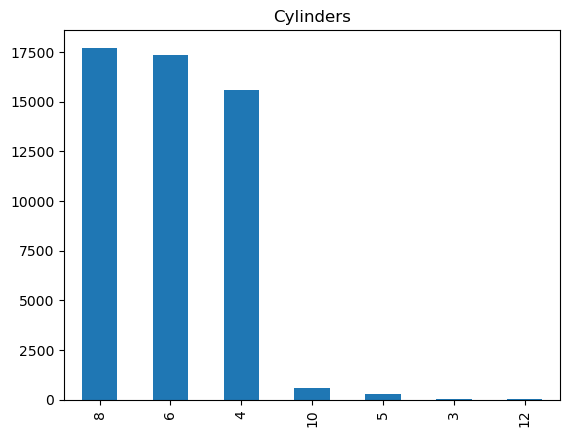

In [207]:
#gráfico de barras de cylinders
bar_cylinders = df["cylinders"].value_counts().plot(kind="bar", title="Cylinders")

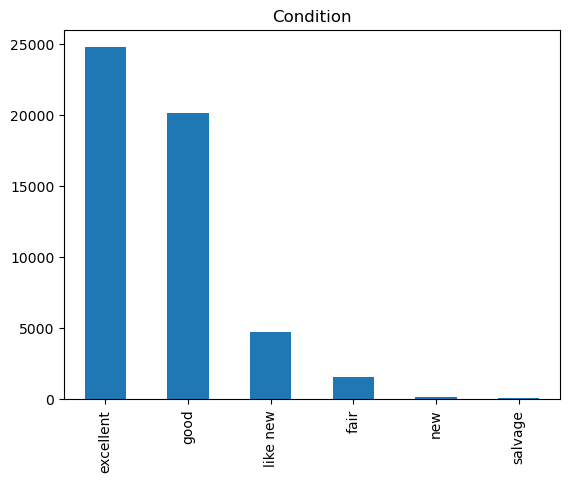

In [208]:
#estudiando "condition"
hist_condition = df["condition"].value_counts().plot(kind="bar", title="Condition")

## Estudiar y tratar valores atípicos

Con los resultados anteriores, se determinará qué columnas pueden contener valores atípicos y se creará un DataFrame sin ellos.

In [209]:
#observando los quartiles
print(df["price"].describe())
Q1_price = df["price"].quantile(0.25)
Q3_price = df["price"].quantile(0.75)
IQR_price = Q3_price - Q1_price

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64


In [210]:
lower_price_limit = Q1_price - (1.5*IQR_price)
upper_price_limit = Q3_price + (1.5*IQR_price)
print(lower_price_limit)
print(upper_price_limit)

-12758.5
34597.5


<AxesSubplot:>

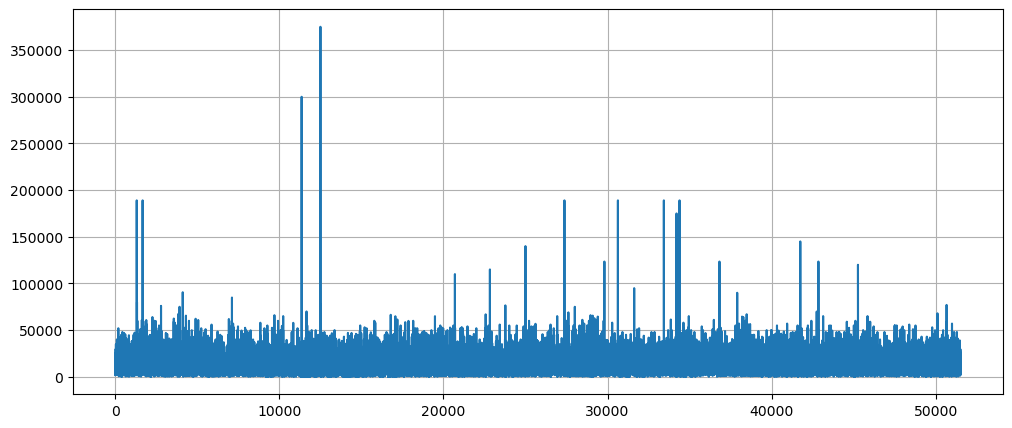

In [211]:
#observando "price" desde otro gráfico
df["price"].plot(grid=True, figsize=(12,5))

In [212]:
#observando cuantos valores hay sobre el bigote superior teórico
print(df[df["price"] > upper_price_limit]["price"].count())
#observando cuantos valores hay bajo el bigote inferior teórico
print(df[df["price"] < lower_price_limit]["price"].count())

1646
0


Si bien, el limite inferior del precio es menor a cero, hay valores en la base de datos que no tienen sentido, muchas veces los vendedores le ponen precios muy bajos a sus vehículos para llamar la atención de los compradores (1 dólar por ejemplo), y estos valores no nos sirven para el estudio, por lo que se pondrá el límite inferior igual a 1000 dólares.

In [213]:
#creando el DataFrame sin los valores atípicos
good_data = df[(df["price"] < upper_price_limit)]

In [214]:
#creando el DataFrame sin los valores atípicos
good_data = good_data[(good_data["price"] > 1000)]

<AxesSubplot:>

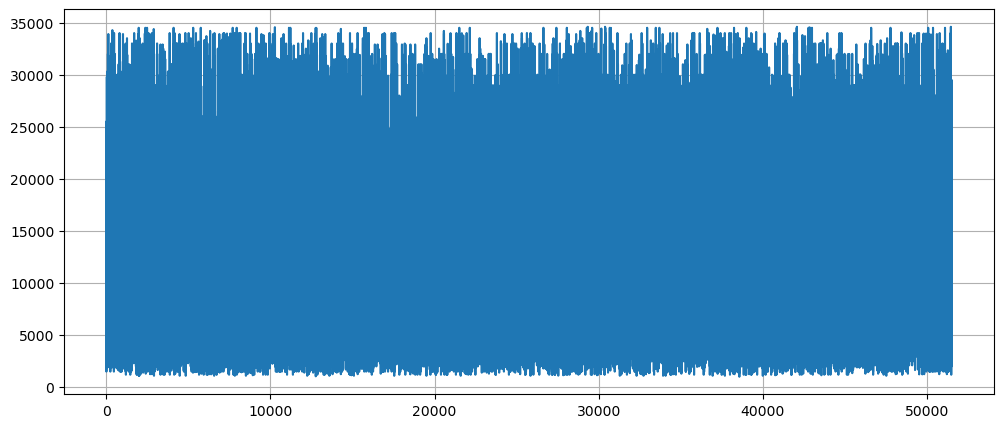

In [215]:
#graficando el nuevo DataFrame
good_data["price"].plot(grid=True, figsize=(12,5))

**"vehicle_years"** contiene bastantes valores atípicos.

In [216]:
#observando los quartiles
print(good_data["vehicle_years"].describe())
Q1_vehicle_years = good_data["vehicle_years"].quantile(0.25)
Q3_vehicle_years = good_data["vehicle_years"].quantile(0.75)
IQR_vehicle_years = Q3_vehicle_years - Q1_vehicle_years

count    48319.000000
mean         8.744407
std          5.957664
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicle_years, dtype: float64


In [217]:
lower_vehicle_years_limit = Q1_vehicle_years - (1.5*IQR_vehicle_years)
upper_vehicle_years_limit = Q3_vehicle_years + (1.5*IQR_vehicle_years)
print(lower_vehicle_years_limit)
print(upper_vehicle_years_limit)

-5.5
22.5


<AxesSubplot:>

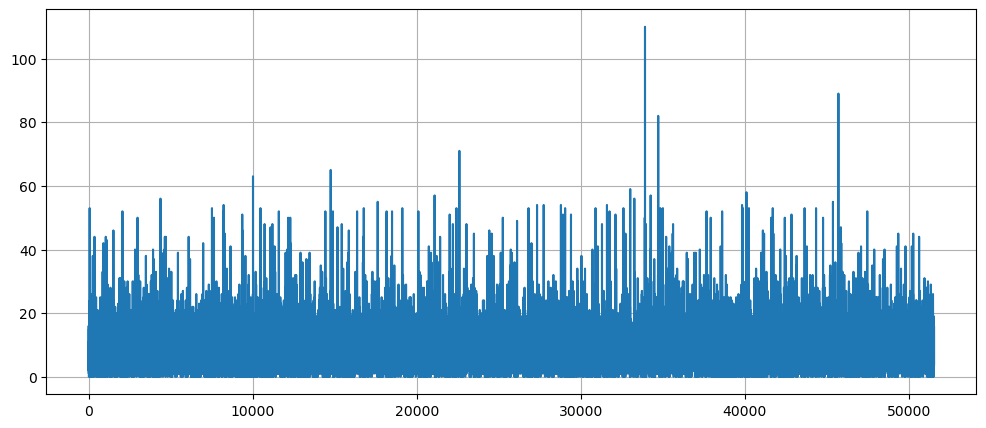

In [218]:
#observando "vehicle_years" desde otro gráfico
good_data["vehicle_years"].plot(grid=True, figsize=(12,5))

In [219]:
#observando cuantos valores hay sobre el bigote superior teórico
print(good_data[good_data["vehicle_years"] > upper_vehicle_years_limit]["vehicle_years"].count())

983


In [220]:
#actualizando el DataFrame sin los valores atípicos
good_data = good_data[(good_data["vehicle_years"] < upper_vehicle_years_limit)]

<AxesSubplot:>

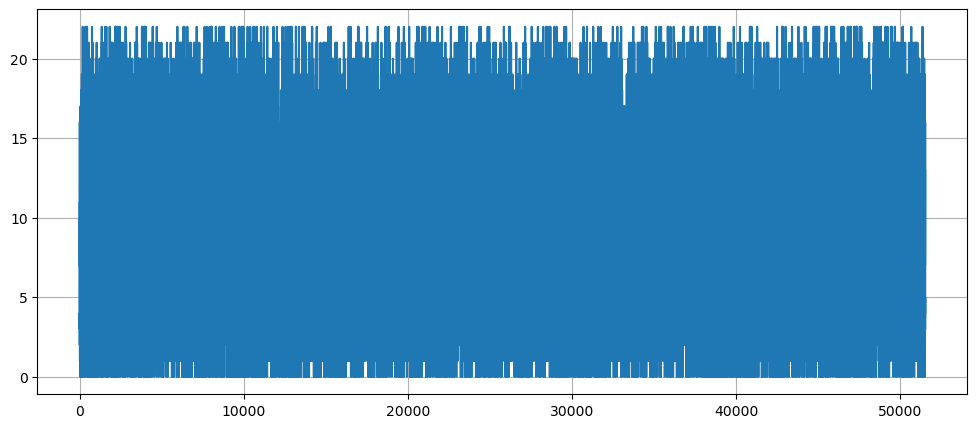

In [221]:
#graficando el nuevo DataFrame
good_data["vehicle_years"].plot(grid=True, figsize=(12,5))

**"odometer"** contiene bastantes valores atípicos.

In [222]:
#observando los quartiles
print(good_data["odometer"].describe())
Q1_odometer = good_data["odometer"].quantile(0.25)
Q3_odometer = good_data["odometer"].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer

count     47336.000000
mean     118025.667927
std       59952.962998
min           0.000000
25%       78272.000000
50%      117927.000000
75%      153000.000000
max      990000.000000
Name: odometer, dtype: float64


In [223]:
lower_odometer_limit = Q1_odometer - (1.5*IQR_odometer)
upper_odometer_limit = Q3_odometer + (1.5*IQR_odometer)
print(lower_odometer_limit)
print(upper_odometer_limit)

-33820.0
265092.0


<AxesSubplot:>

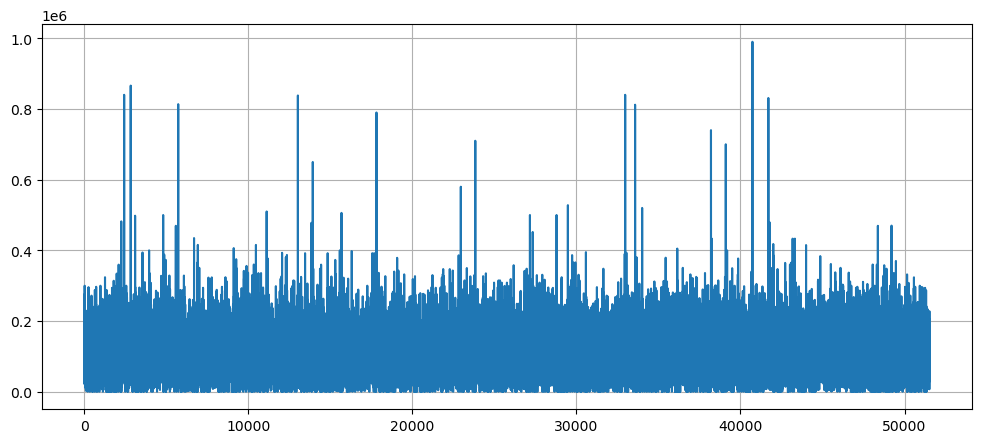

In [224]:
#observando "odometer" desde otro gráfico
good_data["odometer"].plot(grid=True, figsize=(12,5))

In [225]:
#observando cuantos valores están sobre y bajo un rango
print(good_data[good_data["odometer"] > upper_odometer_limit]["odometer"].count())

676


In [226]:
#creando el DataFrame sin los valores atípicos
good_data = good_data[(good_data["odometer"] < upper_odometer_limit)]

<AxesSubplot:>

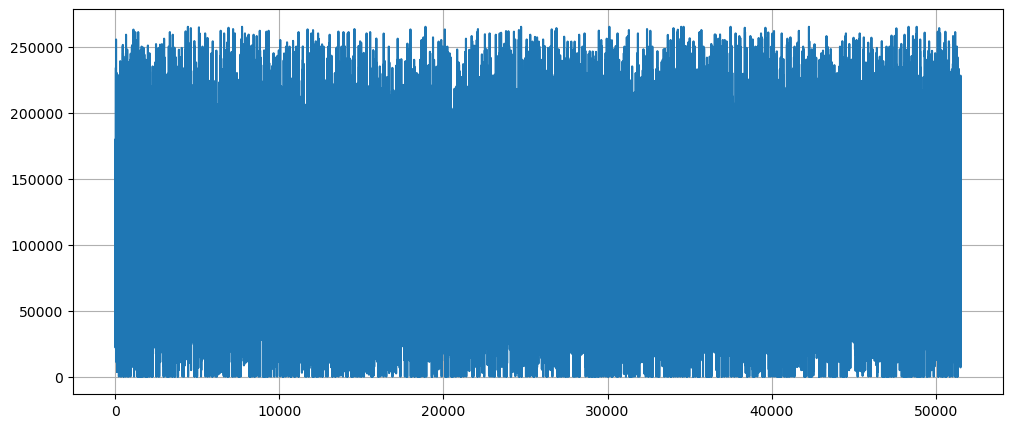

In [227]:
#graficando el nuevo DataFrame de odometer
good_data["odometer"].plot(grid=True, figsize=(12,5))

**"cylinders"** contiene valores atípicos.

In [228]:
#observando los quartiles
print(good_data["cylinders"].describe())
Q1_odometer = good_data["cylinders"].quantile(0.25)
Q3_odometer = good_data["cylinders"].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer

count    46660.000000
mean         6.031012
std          1.636455
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64


In [229]:
lower_odometer_limit = Q1_odometer - (1.5*IQR_odometer)
upper_odometer_limit = Q3_odometer + (1.5*IQR_odometer)
print(lower_odometer_limit)
print(upper_odometer_limit)

-2.0
14.0


In [230]:
good_data["cylinders"].value_counts()

6     15994
8     15267
4     14853
5       269
10      243
3        32
12        2
Name: cylinders, dtype: int64

Teniendo en cuenta estos límites, se observa que no hay valores atípicos dentro de la columna "cylinders", aunque el valor 3 y 12 tienen muy poca frecuencia. 

**"condition"** contiene valores atípicos.

In [231]:
#observando los quartiles
print(good_data["condition_id"].describe())
Q1_odometer = good_data["condition_id"].quantile(0.25)
Q3_odometer = good_data["condition_id"].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer

count    46660.000000
mean         2.636712
std          0.690412
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_id, dtype: float64


In [232]:
lower_odometer_limit = Q1_odometer - (1.5*IQR_odometer)
upper_odometer_limit = Q3_odometer + (1.5*IQR_odometer)
print(lower_odometer_limit)
print(upper_odometer_limit)

0.5
4.5


Se observa que, según los límites, la condición 0 = "salvage" y 5 = "new", son valores atípicos, por lo que se eliminarán de "good_data".

In [233]:
#eliminando condition = salvage y condition = new
good_data = good_data.query('(condition_id > 0) and (condition_id < 5)')
#comprobando que se eliminaron correctamente
good_data["condition_id"].unique()

array([2, 4, 1, 3])

In [234]:
#comprobando que funcionó
good_data.value_counts("condition")

condition
excellent    22418
good         18832
like new      4141
fair          1112
dtype: int64

In [235]:
#sustituyendo como "Other" los valores 0 y 5.
typical_condition_values = [1, 2, 3, 4]
good_data["condition_id"] = good_data["condition_id"].where(good_data["condition_id"].isin(typical_condition_values), "Other")

In [236]:
#comprobando que funcionó
good_data.value_counts("condition_id")

condition_id
3    22418
2    18832
4     4141
1     1112
dtype: int64

## Estudiar parámetros principales sin valores atípicos

Se crearán nuevos histogramas con los datos filtrados para compararlos con los histogramas originales.

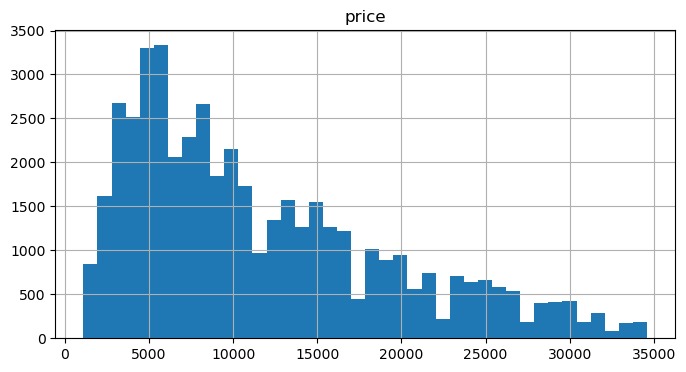

In [237]:
#creando el histograma sin valores atípicos
hist_price = good_data.hist("price", bins=40, grid=True,figsize=(8,4))

Habían datos donde el precio era muy bajo para lo que se estaba ofreciendo, eran valores que no tenían sentido, a veces las personas usan esos precios que no son reales para llamar la atención del comprador, es por eso que se filtró el DataFrame para que el precio fuera mayor a 1000 dólares.

Por el otro lado, habían precios excesivos para lo que se estaba ofreciendo, por lo que se filtró para eliminar los valores mayores al bigote superior teórico.

El gráfico se ve mucho mejor que el anterior, si bien aún existe una gran diferencia en los precios

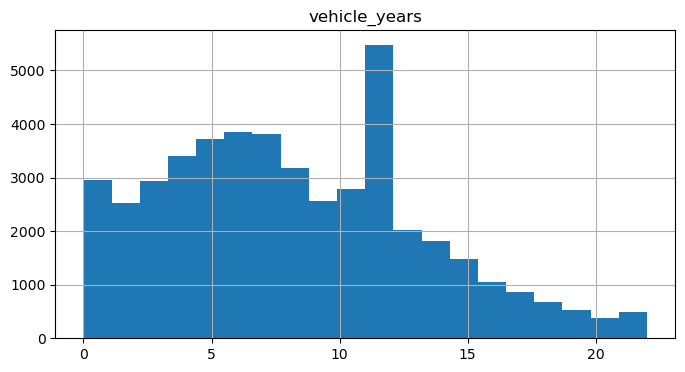

In [238]:
#creando el histograma sin valores atípicos
hist_vehicle_years = good_data.hist("vehicle_years", bins=20, grid=True,figsize=(8,4))

En el histograma original de "vehicle_years" habían valores de 100 años, por lo que se utilizó un filtro para tener solo valores hasta 24 años.

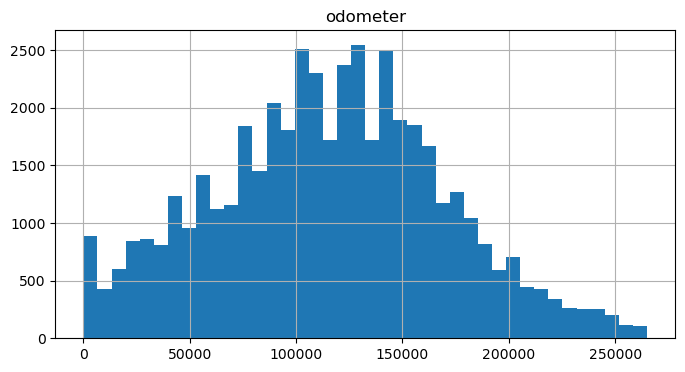

In [239]:
#creando el histograma sin valores atípicos
hist_odometer = good_data.hist("odometer", bins=40, grid=True,figsize=(8,4))

En el histograma original de "odometer" no se lograba identificar los valores. Al poner un límite de hasta 279433 se logran ver mejor los datos, aunque este valor sigue siendo muy alto y alejado de la media y mediana.

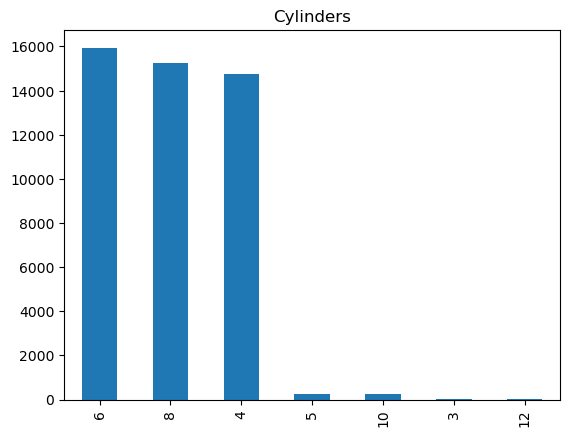

In [240]:
#gráfico de barras con los datos pequeños agrupados
bar_cylinders = good_data["cylinders"].value_counts().plot(kind="bar", title="Cylinders")

Para "cylinders" se agruparon los datos más pequeños en un solo grupo "Other", y este aún sigue siendo casi insignificante al lado de los otros datos, pero con esta agrupación se puede observar mejor el gráfico.

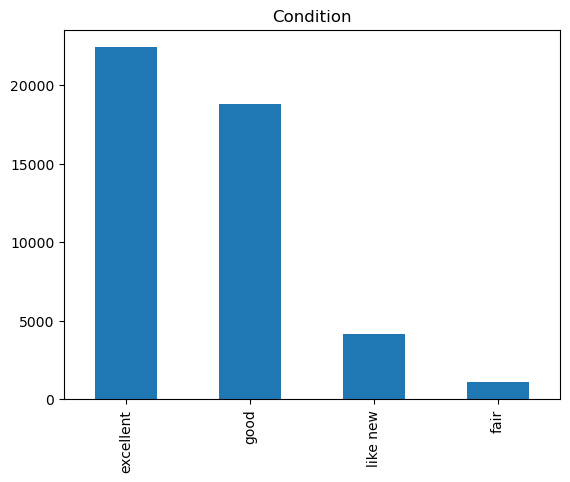

In [241]:
#gráfico de barras con los datos pequeños agrupados
bar_condition = good_data["condition"].value_counts().plot(kind="bar", title="Condition")

Para "condition" también se agruparon los datos más pequeños en un solo grupo "Other", al igual que el anterior, "Other" sigue siendo casi insignificante al lado de los otros datos, pero con esta agrupación se puede observar mejor el gráfico.

## Periodo de colocación de los anuncios

In [242]:
#observando los quartiles
print(good_data["days_listed"].describe())
Q1_days_listed = good_data["days_listed"].quantile(0.25)
Q3_days_listed = good_data["days_listed"].quantile(0.75)
IQR_days_listed = Q3_days_listed - Q1_days_listed

count    46503.000000
mean        39.576350
std         28.246986
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


In [243]:
#calculando los bigotes teóricos
lower_days_listed_limit = Q1_days_listed - (1.5*IQR_days_listed)
upper_days_listed_limit = Q3_days_listed + (1.5*IQR_days_listed)
print(lower_days_listed_limit)
print(upper_days_listed_limit)

-32.0
104.0


Se puede observar que hay anuncios que estuvieron 0 días y otros 271 días.

Se podría decir que el período habitual de los anuncios son entre 19 a 53 días, con una media de 39 y una mediana de 33.

El 25% de los datos están sobre los 53 días, por lo que 271 días es demasiado.
El 25% de los datos inferiores están bajo los 19 días.

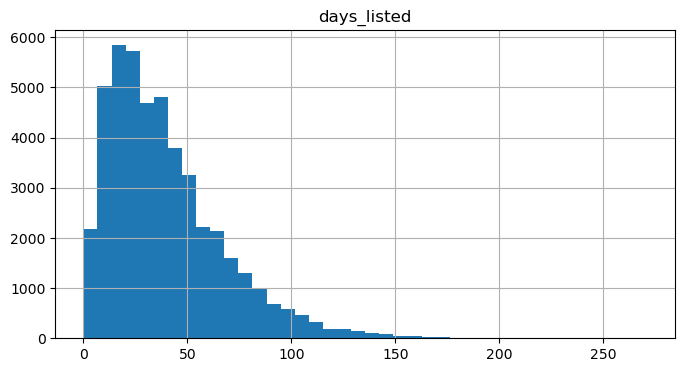

In [244]:
#creando el histograma de "days_listed" del DF original
hist_days_listed = good_data.hist("days_listed", bins=40, grid=True,figsize=(8,4))

(0.0, 104.0)

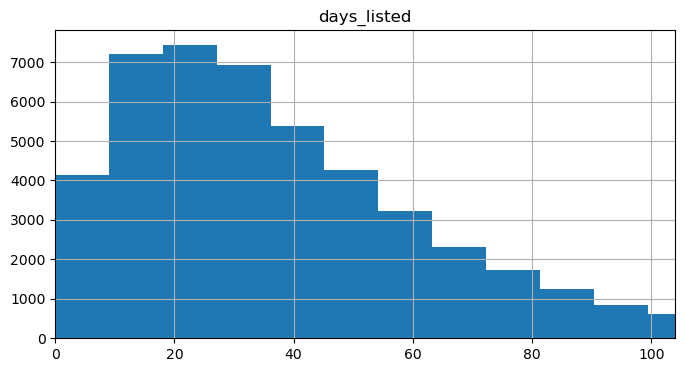

In [245]:
#analizando mejor el histograma usando los límites
hist_days_listed = good_data.hist("days_listed", bins=30, grid=True,figsize=(8,4))
plt.xlim(0,104)

## Precio promedio por cada tipo de vehículo

A continuación se analizará el número de anuncios y el precio promedio para cada tipo de vehículo en el data frame sin datos atípicos de "price" y en data frame original.

In [246]:
#utilizando el DF sin datos atípicos
type_pivot_table = good_data.pivot_table(index="type", values="price", aggfunc=["count", "mean"])
type_pivot_table.columns = ["count", "mean"]
type_pivot_table = type_pivot_table.sort_values("count", ascending = False)
print(type_pivot_table)

             count          mean
type                            
sedan        11472   7234.641301
SUV          11443  10830.153631
truck        10682  15675.513293
pickup        6169  15276.547090
coupe         1879  14321.178819
wagon         1472   9167.005435
mini-van      1122   8166.901070
hatchback      964   7069.637967
van            554   9264.158845
convertible    320  13660.696875
other          230  10670.943478
offroad        175  14775.640000
bus             21  18107.428571


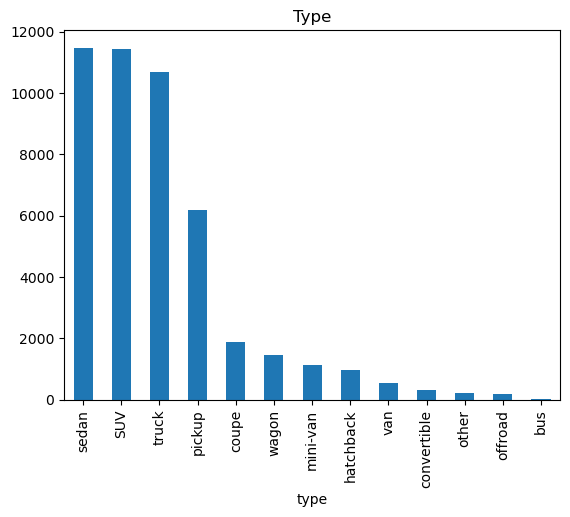

In [247]:
#gráfico de barras de type
bar_type = type_pivot_table["count"].plot(kind="bar", title="Type")

Los dos tipos de vehículos más publicados son SUV y sedan.

## Factores de precio

A continuación se observa como varía el precio de cada tipo de vehículo según las distintas variables

**SEDAN**

In [248]:
#creando matriz para estudiar a type = sedan
sedan_df = good_data[good_data["type"] == "sedan"]
sedan_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_years,odometer_mean,condition_id
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,6,18333.33,4
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,2,40451.50,3
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2018,4,14488.50,3
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2018,3,26404.00,3
11,8990,2012,honda accord,excellent,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,2019,7,15877.43,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005,ford taurus,excellent,6,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63,2018,13,8476.92,3
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,2018,5,17627.20,4
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,2018,9,14222.22,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2018,5,27914.60,2


<AxesSubplot:xlabel='vehicle_years', ylabel='price'>

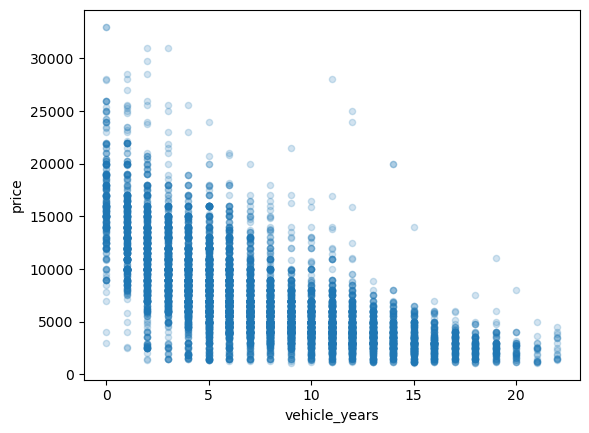

In [249]:
#creando una matriz de dispersión
sedan_df.plot(x="vehicle_years", y="price", kind="scatter", alpha=0.2)

In [250]:
#observando la correlación entre ambas variables
sedan_df["price"].corr(df["vehicle_years"])

-0.6909326641253254

En el gráfico se puede observar que mientras menos años tenga el vehículo, más caro es el precio. Esto se puede corroborar al obtener la correlación, la cual es negativa, por lo que si odometer_mean baja, price sube.

<AxesSubplot:xlabel='odometer', ylabel='price'>

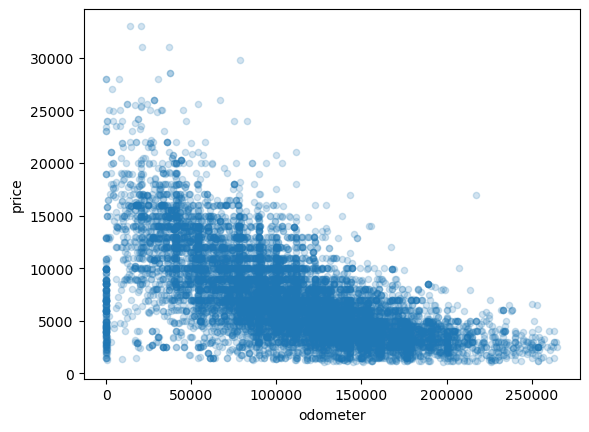

In [251]:
#creando una matriz de dispersión
sedan_df.plot(x="odometer", y="price", kind="scatter", alpha=0.2)

In [252]:
#observando la correlación entre ambas variables
sedan_df["price"].corr(df["odometer"])

-0.6356175856861633

En el gráfico se puede observar que mientras menos millaje tenga el vehículo, más caro es el precio. Esto se puede corroborar al obtener la correlación, la cual es negativa, por lo que si odometer_mean baja, price sube. El problema es que esto no toma en cuenta la cantidad de años del vehículo, por lo que se graficará también el precio con respecto al millaje anual.

<AxesSubplot:xlabel='odometer_mean', ylabel='price'>

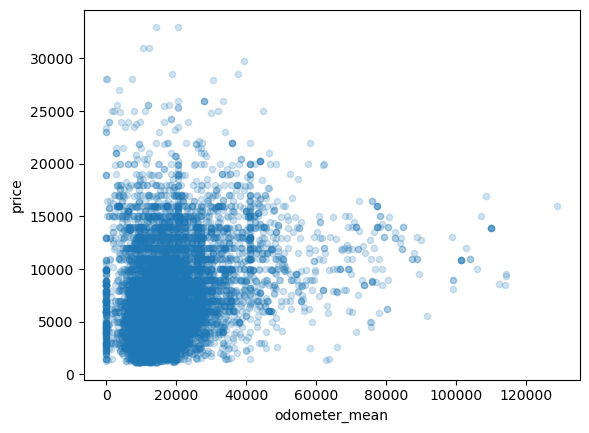

In [253]:
#creando una matriz de dispersión
sedan_df.plot(x="odometer_mean", y="price", kind="scatter", alpha=0.2)

In [254]:
#observando la correlación entre ambas variables
sedan_df["price"].corr(df["odometer_mean"])

0.28939458911180094

Es extraño como se comporta el precio con "odometer_mean", ya que tienen una correlación positiva, lo cual en teoría no debería ser pues significa que mientras más millaje promedio tenga el vehículo, más caro es. 

<AxesSubplot:xlabel='days_listed', ylabel='price'>

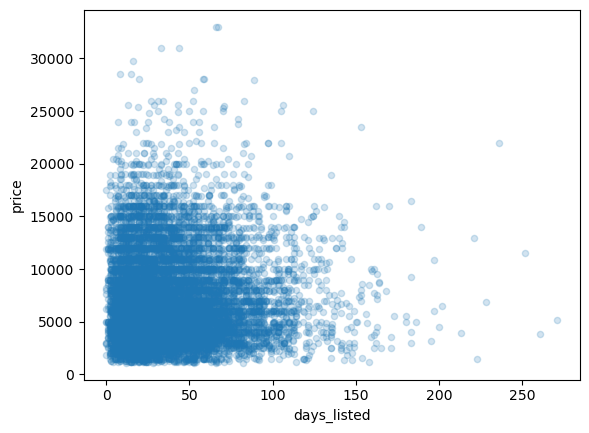

In [255]:
#creando una matriz de dispersión
sedan_df.plot(x="days_listed", y="price", kind="scatter", alpha=0.2)

In [256]:
#observando la correlación entre ambas variables
sedan_df["price"].corr(df["days_listed"])

0.002924852722181606

La correlación entre price y days_listed es muy cercana a 0, por lo que se puede concluir que no tienen correlación, es decir, el precio de sedan no depende de los días de la publicación.

<AxesSubplot:xlabel='condition_id', ylabel='price'>

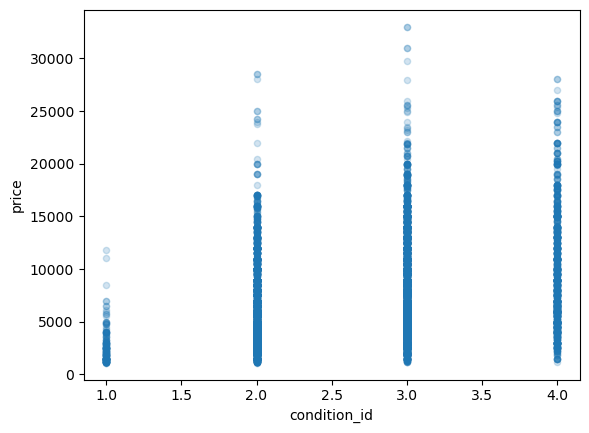

In [257]:
#creando una matriz de dispersión
sedan_df.plot(x="condition_id", y="price", kind="scatter", alpha=0.2)

In [258]:
#observando la correlación entre ambas variables
sedan_df["price"].corr(df["condition_id"])

0.31185403479451007

Se observa en el gráfico y en el valor de la correlación, que esta es positiva, es decir, el precio aumenta si condition_id aumente, lo que significa que mientras en mejor estado esté el vehículo, mayor precio tiende a tener.

In [259]:
#verificando que cada categoría tenga más de 50 valores
sedan_df["condition_id"].value_counts()

3    5833
2    4187
4    1255
1     197
Name: condition_id, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

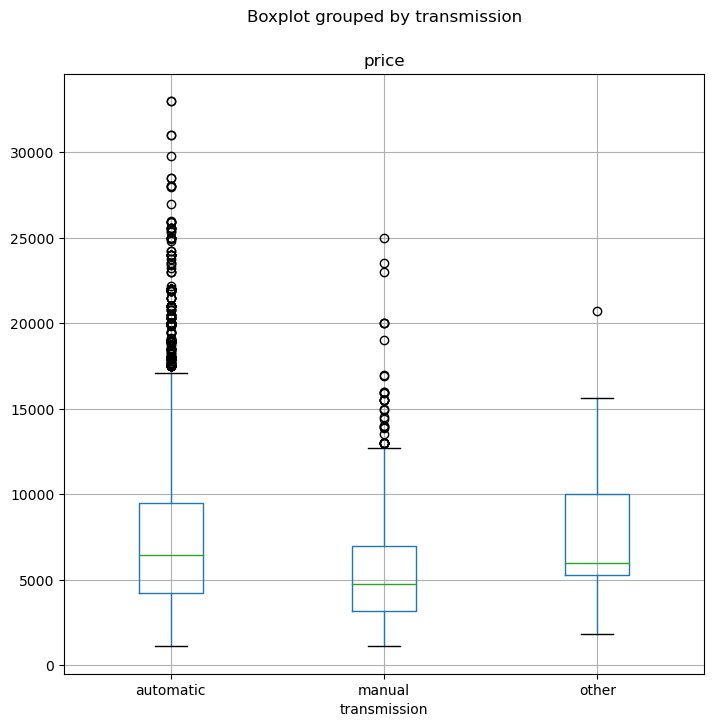

In [260]:
#creando un gráfico de caja
sedan_df.boxplot(column = "price", by="transmission", figsize=(8,8))

Gracias al gráfico se puede observar que los vehículos sedan con transmisión automática se venden más caros que los manuales. Además se puede observar que hay otros tipos de transmisiones que también cobran más caro que los autos manuales.

In [261]:
#verificando que cada categoría tenga más de 50 valores
sedan_df["transmission"].value_counts()

automatic    10858
manual         541
other           73
Name: transmission, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

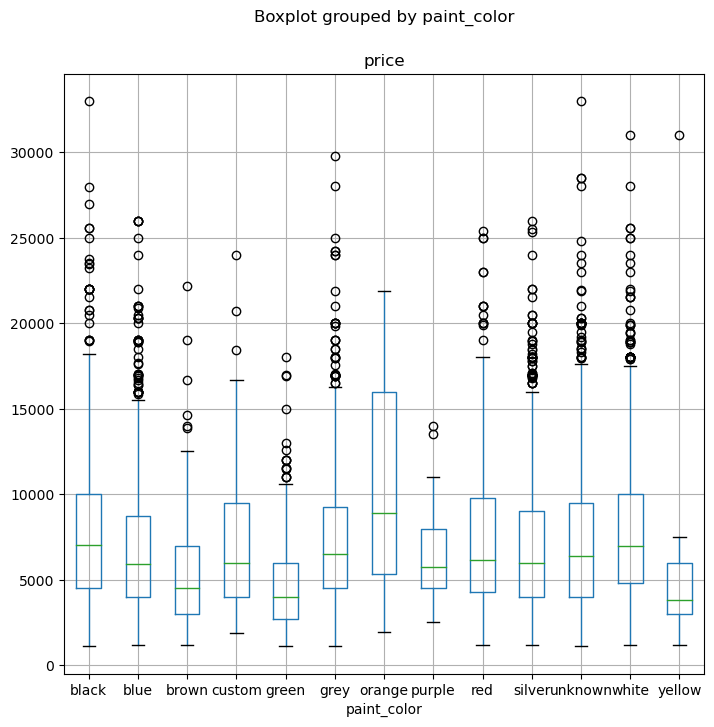

In [262]:
#creando un gráfico de caja
sedan_df.boxplot(column = "price", by="paint_color", figsize=(8,8))

In [263]:
#verificando que cada categoría tenga más de 50 valores
count_colors = sedan_df["paint_color"].value_counts().reset_index()
count_colors.columns = ["color", "count"]
count_colors = count_colors[count_colors["count"] >= 50]
sedan_colors = count_colors["color"].unique()
sedan_colors

array(['unknown', 'silver', 'black', 'grey', 'white', 'blue', 'red',
       'custom', 'brown', 'green'], dtype=object)

In [264]:
#eliminando los colores que tienen menos de 50 valores
sedan_df = sedan_df.query('paint_color in @sedan_colors')

In [265]:
#verificando que funcionó
sedan_df["paint_color"].unique()

array(['red', 'black', 'white', 'grey', 'silver', 'unknown', 'custom',
       'blue', 'green', 'brown'], dtype=object)

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

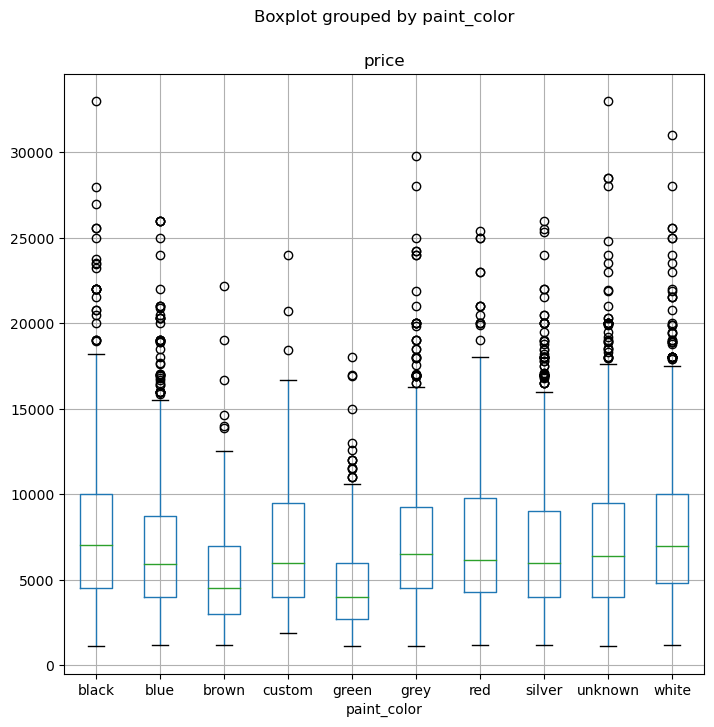

In [266]:
#creando un gráfico de caja
sedan_df.boxplot(column = "price", by="paint_color", figsize=(8,8))

Después de observar el gráfico se puede concluir que no hay una correlación entre el precio y el color del vehículo.

**SUV**

In [267]:
#creando matriz para estudiar a type = sedan
suv_df = good_data[good_data["type"] == "SUV"]
suv_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_years,odometer_mean,condition_id
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018,7,20714.29,2
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2019,6,18245.50,3
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,2018,6,17362.33,3
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2019,11,13381.00,3
14,12990,2009,gmc yukon,excellent,8,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,2019,10,13228.50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012,chevrolet traverse,good,6,gas,144500.0,automatic,SUV,unknown,True,2019-03-05,1,2019,7,20642.86,2
51496,4999,2002,toyota 4runner,excellent,6,gas,177901.0,automatic,SUV,unknown,True,2018-05-26,59,2018,16,11118.81,3
51500,6995,2012,buick enclave,excellent,6,gas,157000.0,automatic,SUV,white,True,2018-08-04,17,2018,6,26166.67,3
51502,7995,2011,chevrolet equinox,like new,4,gas,111088.0,automatic,SUV,unknown,False,2019-04-01,175,2019,8,13886.00,4


<AxesSubplot:xlabel='vehicle_years', ylabel='price'>

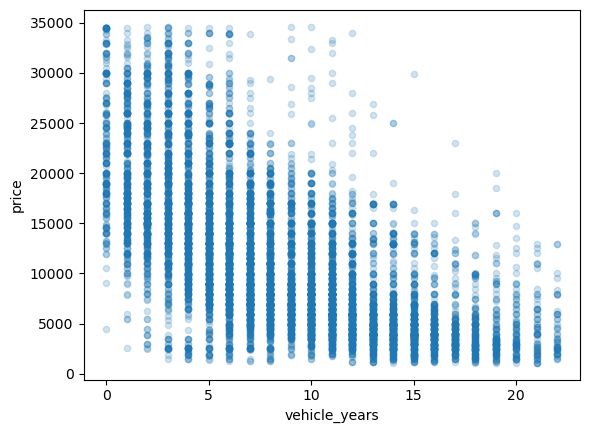

In [268]:
#creando una matriz de dispersión
suv_df.plot(x="vehicle_years", y="price", kind="scatter", alpha=0.2)

In [269]:
#observando la correlación entre ambas variables
suv_df["price"].corr(df["vehicle_years"])

-0.6534943981128774

En el gráfico se puede observar que, al igual que en los sedan, mientras menos años tenga el vehículo, más caro es el precio. Esto se puede corroborar al obtener la correlación, la cual es negativa, por lo que si odometer_mean baja, price sube.

<AxesSubplot:xlabel='odometer', ylabel='price'>

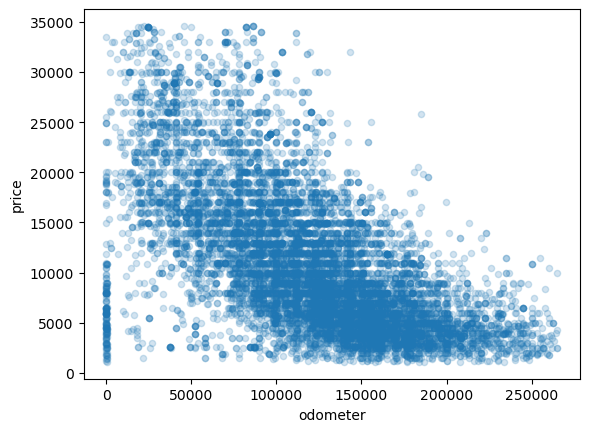

In [270]:
#creando una matriz de dispersión
suv_df.plot(x="odometer", y="price", kind="scatter", alpha=0.2)

In [271]:
#observando la correlación entre ambas variables
suv_df["price"].corr(df["odometer"])

-0.612408953797843

Esta correlación también es negativa, es decir, cuando odometer es menor, el precio del vehículo es mayor. Mientras más millaje tenga el vehículo, más barato se debe cobrar.

<AxesSubplot:xlabel='odometer_mean', ylabel='price'>

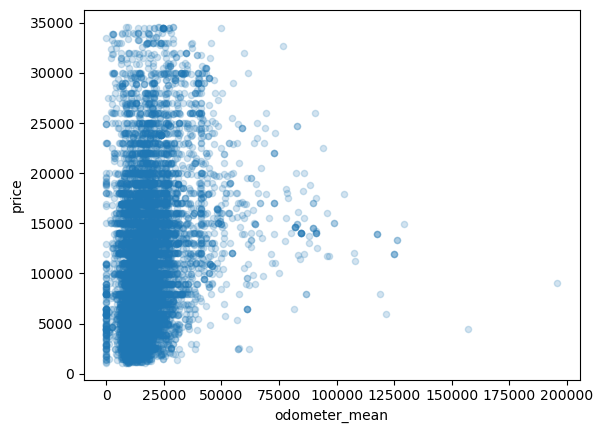

In [272]:
#creando una matriz de dispersión
suv_df.plot(x="odometer_mean", y="price", kind="scatter", alpha=0.2)

In [273]:
#observando la correlación entre ambas variables
suv_df["price"].corr(df["odometer_mean"])

0.2771289504986108

La conclusión anterior no se refleja en el gráfico de correlación entre millaje anual y precio, es más, este tiene correlación positiva, planteando que mientras mayor sea el millaje anual, mayor será el precio de el vehículo.

<AxesSubplot:xlabel='days_listed', ylabel='price'>

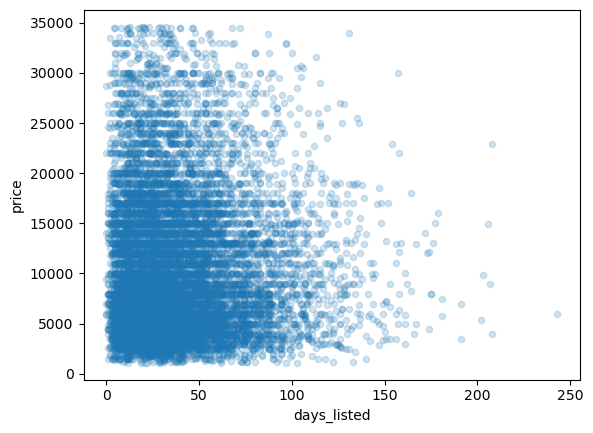

In [274]:
#creando una matriz de dispersión
suv_df.plot(x="days_listed", y="price", kind="scatter", alpha=0.2)

In [275]:
#observando la correlación entre ambas variables
suv_df["price"].corr(df["days_listed"])

-0.021556707321805313

A comparación del vehículo sedan, suv tiene una mayor correlación entre precio y días publicados, si bien sigue siendo bajísima la correlación, se puede dar que quizás las personas que publican sus vehículos ven que a un precio no se está vendiendo su auto y ha pasado mucho tiempo, entonces le bajan el precio. Pero en realidad la correlación es muy baja para asegurar esa afirmación.

<AxesSubplot:xlabel='condition_id', ylabel='price'>

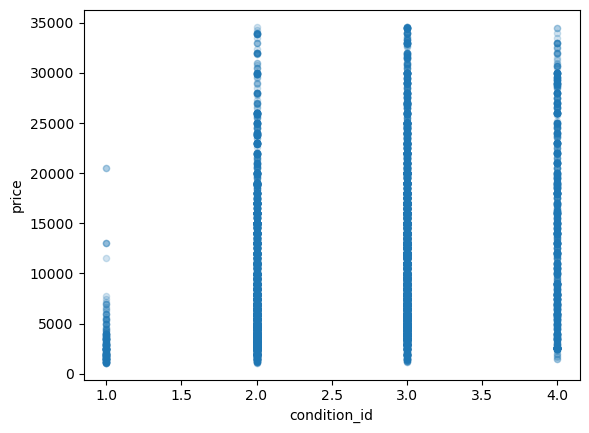

In [276]:
#creando una matriz de dispersión
suv_df.plot(x="condition_id", y="price", kind="scatter", alpha=0.2)

In [277]:
#observando la correlación entre ambas variables
suv_df["price"].corr(df["condition_id"])

0.2840831961683467

Al igual que con sedan, mientras el auto esté en mejores condiciones, mayor será el precio.

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

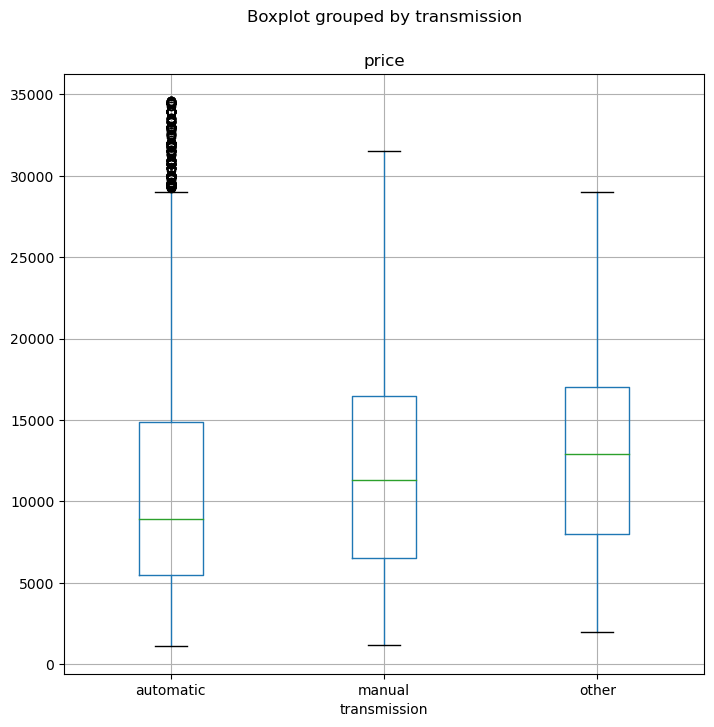

In [278]:
#creando un gráfico de caja
suv_df.boxplot(column = "price", by="transmission", figsize=(8,8))

In [279]:
#verificando que cada categoría tenga más de 50 valores
suv_df["transmission"].value_counts()

automatic    10903
manual         448
other           92
Name: transmission, dtype: int64

Contrario al sedan, parece ser que suv es más caro cuando es de transmisión manual, incluso de otro tipo de transmisión antes que automático.

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

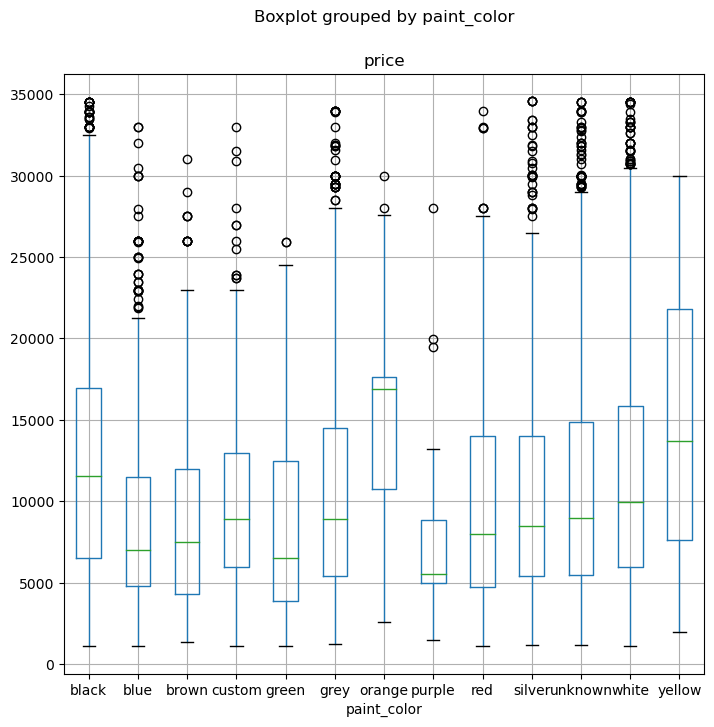

In [280]:
#creando un gráfico de caja
suv_df.boxplot(column = "price", by="paint_color", figsize=(8,8))

In [281]:
#verificando que cada categoría tenga más de 50 valores
count_colors = suv_df["paint_color"].value_counts().reset_index()
count_colors.columns = ["color", "count"]
count_colors = count_colors[count_colors["count"] >= 50]
suv_colors = count_colors["color"].unique()
suv_colors

array(['unknown', 'black', 'white', 'silver', 'grey', 'blue', 'red',
       'green', 'brown', 'custom', 'orange'], dtype=object)

In [282]:
#eliminando los colores que tienen menos de 50 valores
suv_df = suv_df.query('paint_color in @sedan_colors')

In [283]:
#verificando que funcionó
suv_df["paint_color"].unique()

array(['unknown', 'black', 'blue', 'red', 'white', 'silver', 'grey',
       'green', 'brown', 'custom'], dtype=object)

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

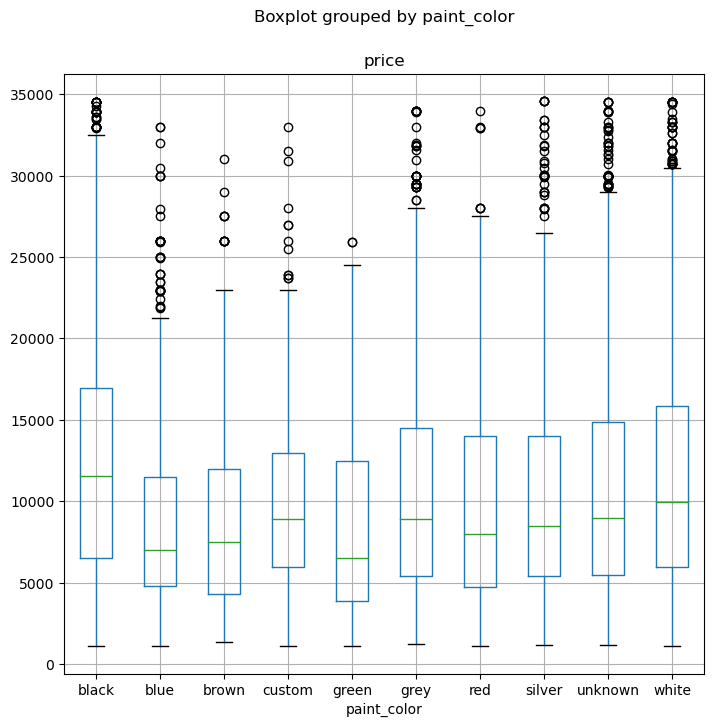

In [284]:
#creando un gráfico de caja
suv_df.boxplot(column = "price", by="paint_color", figsize=(8,8))

Parece ser que los vendedores venden más caro cuando es color negro, pero en realidad la variación es muy pequeña, así que no es posible afirmar con seguridad que siempre los vehículos negros se venden más caros. 

## Conclusión general

Lo primero que se hizo fue identificar y verificar que los valores ausentes fueran aleatorios, luego se procedió a rellenar los valores ausentes en base a las características que mejor representara a cada valor ausente.

Posteriormente se arregló el tipo de datos de cada columna para trabajar mejor con los datos y se enriqueció la data agregando columnas que servirían posteriormente.

Después se realizaron histogramas para estudiar las variables, para luego estudiar los valores atípicos de cada columna y así eliminar los datos muy atípicos. Esto se hizo calculando los bigotes teóricos superior e inferior de cada variable importante.

Finalmente se realizaron los gráficos de dispersión y se calculó la correlación de todas las variables que podrían influir en el precio de los dos tipos de autos que más hay en el mercado (sedan y suv), con los datos ya arreglados sin valores atípicos. Para las variables categóricas se crearon gráficos de cajas.

Se concluyó que el precio de un vehículo publicado depende en su mayor parte del tipo de vehículo (type), años del vehículo (vehicle_years), del millaje (odometer), de la condición (condition) en la que este se encuentre y de la transmisión del vehículo (transmission).